Comprehensive feature set: 50 features

Available features: 50
Using 50 features for PCA analysis

Missing data summary:
Features with missing data: 0
Total missing values: 0

Dataset size after handling missing data: 2000 cities

PCA Results:
Components for 80% variance: 15
Components for 90% variance: 22
Components for 95% variance: 29
First 2 components explain: 30.5% of variance


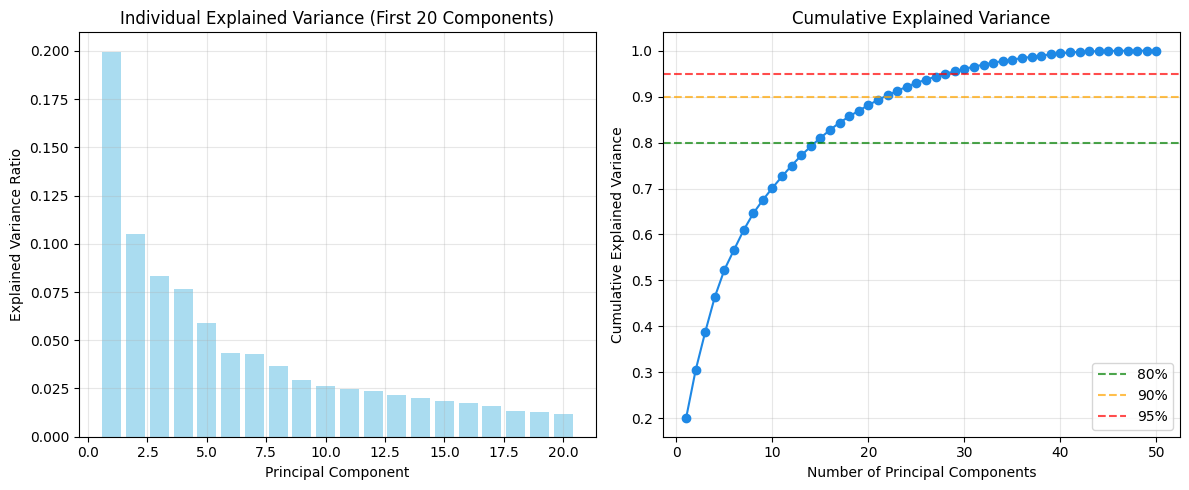

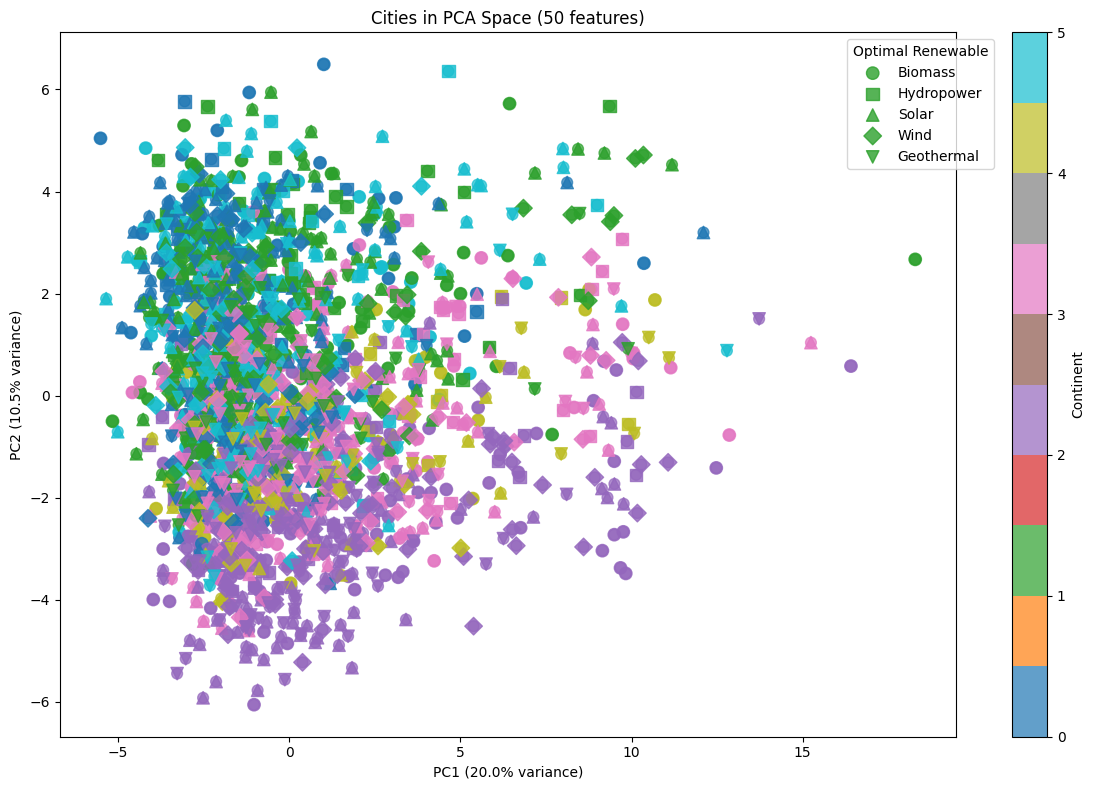

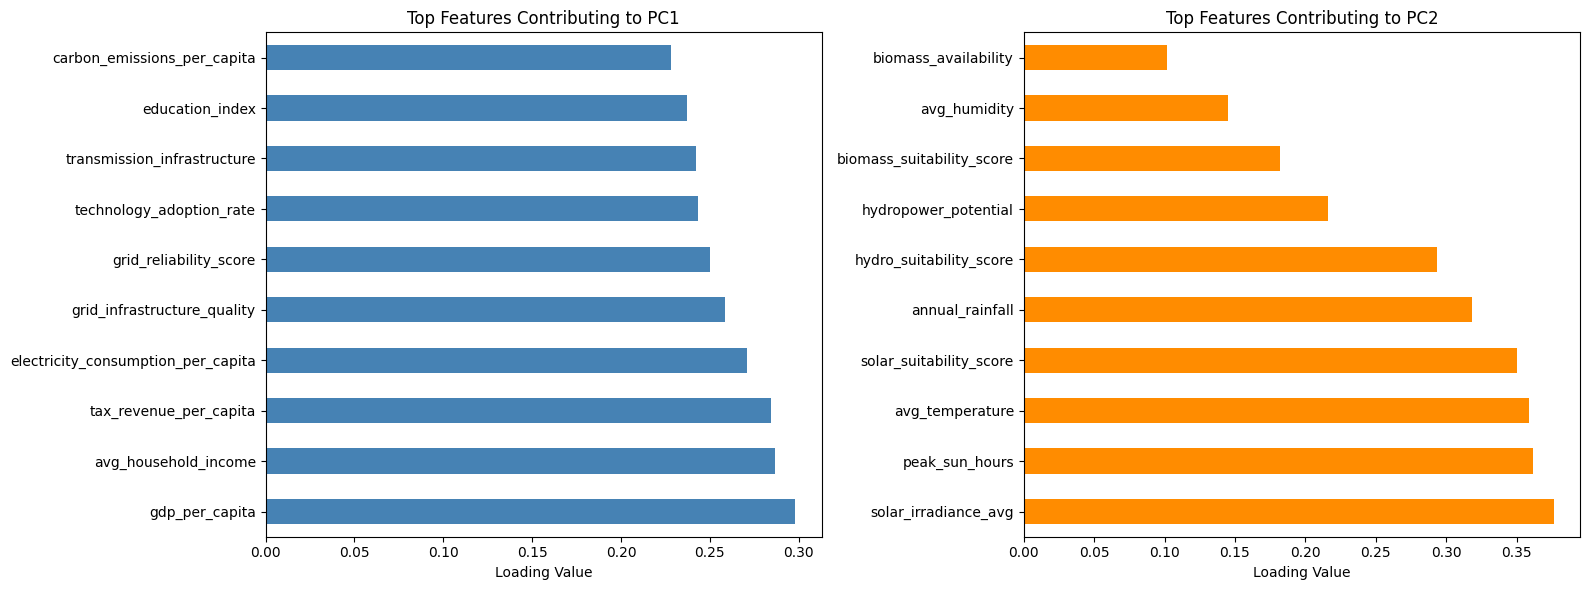


Top 10 most influential features across PC1 and PC2:
                           PC1    PC2  total_contribution
solar_irradiance_avg    -0.069  0.376               0.445
avg_temperature         -0.067  0.359               0.425
peak_sun_hours          -0.063  0.362               0.425
temperature_range        0.060 -0.337               0.396
solar_suitability_score -0.019  0.350               0.369
annual_rainfall         -0.045  0.318               0.363
gdp_per_capita           0.298  0.033               0.331
hydro_suitability_score  0.029  0.294               0.323
avg_household_income     0.287  0.034               0.321
tax_revenue_per_capita   0.285  0.034               0.318


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
df = pd.read_csv("..//data//City_Optimized.csv")

# Comprehensive Feature Selection for Renewable Energy Analysis
comprehensive_features = [
    # === ENERGY & RENEWABLES (Core) ===
    "current_renewable_percentage", "fossil_fuel_dependency", "renewable_target_2030",
    "solar_irradiance_avg", "peak_sun_hours", "solar_suitability_score",
    "avg_wind_speed", "wind_power_density", "wind_suitability_score",
    "hydropower_potential", "hydro_suitability_score",
    "geothermal_gradient", "geothermal_suitability_score",
    "biomass_availability", "biomass_suitability_score",

    # === INFRASTRUCTURE & GRID ===
    "grid_infrastructure_quality", "grid_reliability_score",
    "energy_storage_capacity", "transmission_infrastructure",
    "electricity_consumption_per_capita", "total_electricity_consumption",

    # === CLIMATE & ENVIRONMENTAL ===
    "avg_temperature", "temperature_range", "avg_humidity",
    "cloud_cover_percentage", "annual_rainfall", "avg_wind_speed",
    "carbon_emissions_per_capita", "air_quality_index",
    "environmental_policy_strength",

    # === ECONOMIC & FINANCIAL ===
    "gdp_per_capita", "cost_of_living_index", "avg_household_income",
    "tax_revenue_per_capita", "renewable_investment",
    "govt_renewable_subsidy", "rd_spending",
    "installation_cost_index", "maintenance_cost_index",

    # === SOCIAL & DEMOGRAPHIC ===
    "population", "population_density", "urban_density_score",
    "unemployment_rate", "education_index",
    "skilled_workforce_percentage", "technology_adoption_rate",

    # === GEOGRAPHIC & SPATIAL ===
    "available_land_area", "river_proximity_score",

    # === POLICY & GOVERNANCE ===
    "political_stability", "permitting_efficiency"
]


print(f"Comprehensive feature set: {len(comprehensive_features)} features")

# Check which features from your dataset are included
available_features = [f for f in comprehensive_features if f in df.columns]
missing_features = [f for f in comprehensive_features if f not in df.columns]

print(f"\nAvailable features: {len(available_features)}")
if missing_features:
    print(f"Missing features: {missing_features}")

# Use available features for analysis
final_features = available_features

# Use comprehensive feature set
final_features = [f for f in comprehensive_features if f in df.columns]
print(f"Using {len(final_features)} features for PCA analysis")

# Check missing data
missing_data = df[final_features].isnull().sum()
print(f"\nMissing data summary:")
print(f"Features with missing data: {(missing_data > 0).sum()}")
print(f"Total missing values: {missing_data.sum()}")

if missing_data.sum() > 0:
    print("\nFeatures with missing values:")
    print(missing_data[missing_data > 0])

# Handle missing data (choose your strategy)
# Option 1: Drop rows with any missing values
X_df = df[final_features].dropna()

# Option 2: Fill missing values (alternative approach)
# X_df = df[final_features].fillna(df[final_features].median())

print(f"\nDataset size after handling missing data: {len(X_df)} cities")

# Extract categorical variables from same subset
continent_subset = df.loc[X_df.index, "continent"]
renewable_subset = df.loc[X_df.index, "optimal_renewable_energy"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

# Fit PCA
pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find components for different variance thresholds
n_components_80 = np.argmax(cumulative_variance >= 0.80) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"\nPCA Results:")
print(f"Components for 80% variance: {n_components_80}")
print(f"Components for 90% variance: {n_components_90}")
print(f"Components for 95% variance: {n_components_95}")
print(f"First 2 components explain: {cumulative_variance[1]:.1%} of variance")

# Enhanced Scree Plot
plt.figure(figsize=(12, 5))

# Subplot 1: Individual variance
plt.subplot(1, 2, 1)
plt.bar(range(1, min(21, len(explained_variance)+1)),
        explained_variance[:min(20, len(explained_variance))],
        color='skyblue', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Individual Explained Variance (First 20 Components)')
plt.grid(alpha=0.3)

# Subplot 2: Cumulative variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'o-', color='#1e88e5')
plt.axhline(0.80, color='green', linestyle='--', alpha=0.7, label='80%')
plt.axhline(0.90, color='orange', linestyle='--', alpha=0.7, label='90%')
plt.axhline(0.95, color='red', linestyle='--', alpha=0.7, label='95%')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 2D PCA Visualization
pca_2d = PCA(n_components=2)
X_pca2 = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca2[:, 0], X_pca2[:, 1],
                     c=pd.Categorical(continent_subset).codes,
                     s=60, alpha=0.7, cmap='tab10')

# Add renewable energy type as shapes (if not too many categories)
renewable_types = renewable_subset.unique()
if len(renewable_types) <= 5:  # Only if manageable number of types
    for i, rtype in enumerate(renewable_types):
        mask = renewable_subset == rtype
        plt.scatter(X_pca2[mask, 0], X_pca2[mask, 1],
                   marker=['o', 's', '^', 'D', 'v'][i % 5],
                   s=80, alpha=0.8, label=rtype,
                   c=pd.Categorical(continent_subset[mask]).codes, cmap='tab10')

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)')
plt.title(f'Cities in PCA Space ({len(final_features)} features)')
plt.colorbar(scatter, label='Continent')
if len(renewable_types) <= 5:
    plt.legend(title='Optimal Renewable', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Feature Loadings Analysis
loadings = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=final_features
)

# Top contributing features
loadings['total_contribution'] = loadings.abs().sum(axis=1)
top_features = loadings.nlargest(12, 'total_contribution')

# Plot top feature loadings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# PC1 loadings
pc1_sorted = loadings.nlargest(10, 'PC1')['PC1'] if loadings['PC1'].max() > abs(loadings['PC1'].min()) else loadings.nsmallest(10, 'PC1')['PC1']
pc1_sorted.plot(kind='barh', ax=ax1, color='steelblue')
ax1.set_title('Top Features Contributing to PC1')
ax1.set_xlabel('Loading Value')

# PC2 loadings
pc2_sorted = loadings.nlargest(10, 'PC2')['PC2'] if loadings['PC2'].max() > abs(loadings['PC2'].min()) else loadings.nsmallest(10, 'PC2')['PC2']
pc2_sorted.plot(kind='barh', ax=ax2, color='darkorange')
ax2.set_title('Top Features Contributing to PC2')
ax2.set_xlabel('Loading Value')

plt.tight_layout()
plt.show()

print(f"\nTop 10 most influential features across PC1 and PC2:")
print(top_features.nlargest(10, 'total_contribution')[['PC1', 'PC2', 'total_contribution']].round(3))

RANDOM FOREST CLASSIFICATION WITH LEAK-PROOF PIPELINE
Class Distribution:
optimal_renewable_energy
Solar         702
Biomass       459
Wind          345
Geothermal    282
Hydropower    212
Name: count, dtype: int64
Most frequent class: 35.1%
Split successful: 1600 train, 400 test samples
Fitting pipeline with hyperparameter search...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters: {'rf_classifier__n_estimators': 150, 'rf_classifier__min_samples_split': 25, 'rf_classifier__min_samples_leaf': 20, 'rf_classifier__max_features': 'log2', 'rf_classifier__max_depth': 15}
Best CV Score: 0.747
Test Accuracy: 0.777


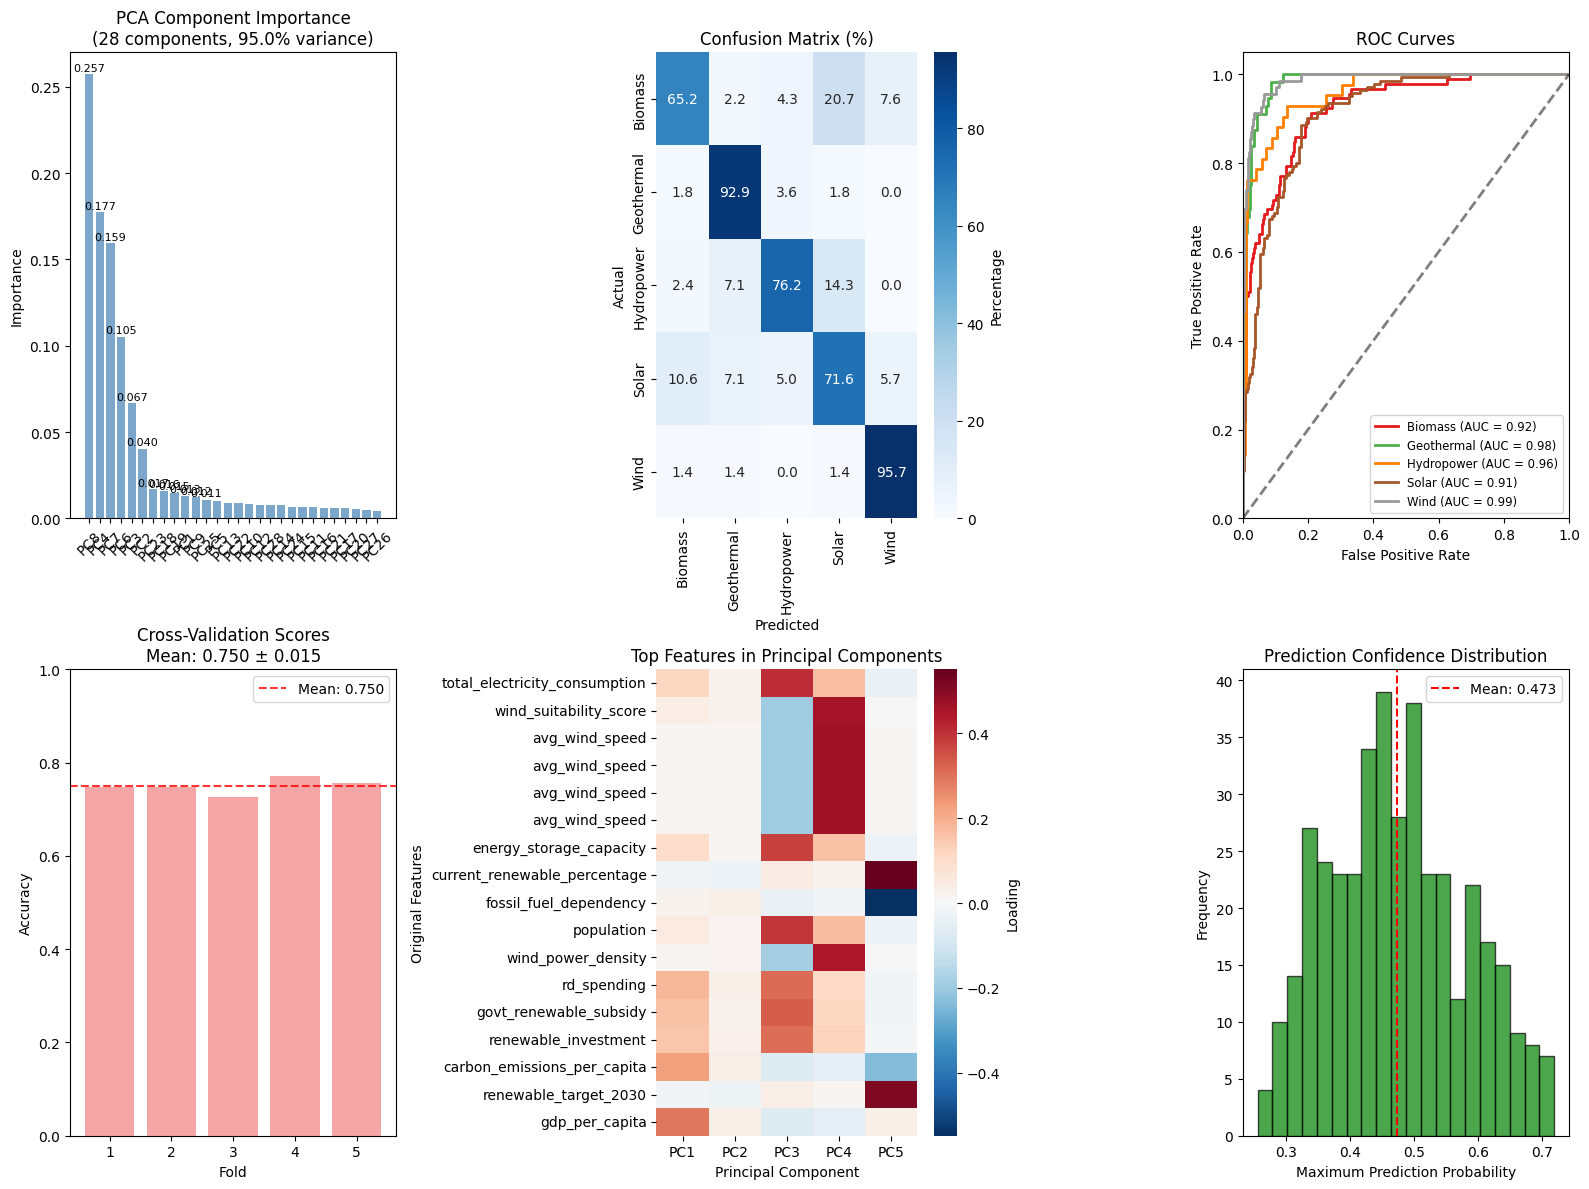


Detailed Classification Report:
              precision  recall  f1-score  support
Biomass           0.769   0.652     0.706   92.000
Geothermal        0.765   0.929     0.839   56.000
Hydropower        0.711   0.762     0.736   42.000
Solar             0.789   0.716     0.751  141.000
Wind              0.815   0.957     0.880   69.000
accuracy          0.778   0.778     0.778    0.778
macro avg         0.770   0.803     0.782  400.000
weighted avg      0.777   0.778     0.774  400.000

MODEL PERFORMANCE SUMMARY
Training Accuracy:     0.8281
Testing Accuracy:      0.7775
CV Accuracy:          0.7505 ± 0.0147
Overfitting Check:     0.0506

PCA Configuration:
Components used:       28
Variance explained:    95.0%
Original features:     50
Dimensionality reduction: 50 → 28


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix,
                           accuracy_score, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

print("="*60)
print("RANDOM FOREST CLASSIFICATION WITH LEAK-PROOF PIPELINE")
print("="*60)

# Prepare target variable - add class distribution check
y_class = df.loc[X_df.index, 'optimal_renewable_energy'].copy()
le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

# Check class distribution
print("Class Distribution:")
class_counts = pd.Series(y_class).value_counts()
print(class_counts)
print(f"Most frequent class: {class_counts.iloc[0]/len(y_class):.1%}")

# Ensure minimum samples per class for stratification
if class_counts.min() < 4:  # Need at least 2 for train, 2 for test in 80-20 split
    print(f"Warning: Some classes have very few samples. Consider grouping rare classes.")

# Train-test split with better error handling
try:
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(
        X_df, y_class_encoded, test_size=0.2, random_state=42, stratify=y_class_encoded
    )
    print(f"Split successful: {len(X_train_raw)} train, {len(X_test_raw)} test samples")
except ValueError as e:
    print(f"Stratification failed: {e}")
    # Fallback to non-stratified split
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(
        X_df, y_class_encoded, test_size=0.2, random_state=42
    )

# Enhanced Pipeline with flexible PCA variance
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # 90% variance
    ('rf_classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))  # Handle class imbalance
])

# Expanded hyperparameter grid with PCA variance tuning
param_grid_pipeline = {
    'rf_classifier__n_estimators': [50, 100, 150, 200],
    'rf_classifier__max_depth': [5,8,10,12, 15],  # Include unlimited depth option
    'rf_classifier__min_samples_leaf': [20,25,30],
    'rf_classifier__min_samples_split': [10,15,25,30],  # Additional regularization
    'rf_classifier__max_features': ['sqrt', 'log2']
}

# Use RandomizedSearchCV for efficiency with larger parameter space
from sklearn.model_selection import RandomizedSearchCV

grid_search_pipe = RandomizedSearchCV(
    pipeline,
    param_grid_pipeline,
    n_iter=20,  # Limit iterations for efficiency
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the pipeline
print("Fitting pipeline with hyperparameter search...")
grid_search_pipe.fit(X_train_raw, y_train)

# Extract results
best_pipe = grid_search_pipe.best_estimator_
y_pred_pipe = best_pipe.predict(X_test_raw)
y_pred_proba_pipe = best_pipe.predict_proba(X_test_raw)

print(f"\nBest Parameters: {grid_search_pipe.best_params_}")
print(f"Best CV Score: {grid_search_pipe.best_score_:.3f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_pipe):.3f}")

# Enhanced Visualization
plt.figure(figsize=(16, 12))

# 1. PCA Component Importance
final_rf_model = best_pipe.named_steps['rf_classifier']
importances = final_rf_model.feature_importances_
n_components_final = best_pipe.named_steps['pca'].n_components_
indices = np.argsort(importances)[::-1]

plt.subplot(2, 3, 1)
plt.title(f'PCA Component Importance\n({n_components_final} components, '
          f'{best_pipe.named_steps["pca"].explained_variance_ratio_.sum():.1%} variance)')
bars = plt.bar(range(len(importances)), importances[indices], color='steelblue', alpha=0.7)
plt.xticks(range(len(importances)), [f'PC{indices[i]+1}' for i in range(len(importances))], rotation=45)
plt.ylabel('Importance')
# Add value labels on bars
for i, bar in enumerate(bars):
    if importances[indices[i]] > 0.01:  # Only label significant components
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{importances[indices[i]]:.3f}', ha='center', va='bottom', fontsize=8)

# 2. Confusion Matrix with percentages
plt.subplot(2, 3, 2)
cm = confusion_matrix(y_test, y_pred_pipe)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_,
            cbar_kws={'label': 'Percentage'})
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 3. ROC Curves (improved)
plt.subplot(2, 3, 3)
n_classes = len(le.classes_)
if n_classes > 2:  # Multi-class ROC
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    colors = plt.cm.Set1(np.linspace(0, 1, n_classes))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba_pipe[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=colors[i], lw=2,
                label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')
else:  # Binary ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba_pipe[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(fontsize='small')

# 4. Cross-validation scores
plt.subplot(2, 3, 4)
cv_scores = cross_val_score(best_pipe, X_df, y_class_encoded, cv=5, n_jobs=-1)
bars = plt.bar(range(1, 6), cv_scores, color='lightcoral', alpha=0.7)
plt.axhline(cv_scores.mean(), color='red', linestyle='--', alpha=0.8, label=f'Mean: {cv_scores.mean():.3f}')
plt.title(f'Cross-Validation Scores\nMean: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()

# 5. Feature importance heatmap (top PCA loadings)
plt.subplot(2, 3, 5)
# Get PCA loadings for top components
pca_model = best_pipe.named_steps['pca']
loadings = pd.DataFrame(
    pca_model.components_[:min(5, len(importances))].T,  # Top 5 components
    columns=[f'PC{i+1}' for i in range(min(5, len(importances)))],
    index=final_features
)
# Show top contributing features
top_features_idx = loadings.abs().sum(axis=1).nlargest(15).index
sns.heatmap(loadings.loc[top_features_idx], cmap='RdBu_r', center=0,
            annot=False, cbar_kws={'label': 'Loading'})
plt.title('Top Features in Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Original Features')

# 6. Prediction confidence distribution
plt.subplot(2, 3, 6)
max_probs = np.max(y_pred_proba_pipe, axis=1)
plt.hist(max_probs, bins=20, alpha=0.7, color='green', edgecolor='black')
plt.axvline(max_probs.mean(), color='red', linestyle='--',
            label=f'Mean: {max_probs.mean():.3f}')
plt.xlabel('Maximum Prediction Probability')
plt.ylabel('Frequency')
plt.title('Prediction Confidence Distribution')
plt.legend()

plt.tight_layout()
plt.show()

# Enhanced Classification Report
print("\nDetailed Classification Report:")
report = classification_report(y_test, y_pred_pipe, target_names=le.classes_, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print(report_df.round(3))

# Model Performance Summary
print("\n" + "="*50)
print("MODEL PERFORMANCE SUMMARY")
print("="*50)

train_acc_pipe = best_pipe.score(X_train_raw, y_train)
test_acc_pipe = best_pipe.score(X_test_raw, y_test)
cv_mean = cv_scores.mean()

print(f"Training Accuracy:     {train_acc_pipe:.4f}")
print(f"Testing Accuracy:      {test_acc_pipe:.4f}")
print(f"CV Accuracy:          {cv_mean:.4f} ± {cv_scores.std():.4f}")
print(f"Overfitting Check:     {train_acc_pipe - test_acc_pipe:.4f}")

# PCA Information
print(f"\nPCA Configuration:")
print(f"Components used:       {n_components_final}")
print(f"Variance explained:    {pca_model.explained_variance_ratio_.sum():.1%}")
print(f"Original features:     {len(final_features)}")
print(f"Dimensionality reduction: {len(final_features)} → {n_components_final}")